In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import re
import os
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline


In [2]:
# create a path to pull the data of whale returns, algo returns and s&p500

whale_path = Path("whale_Returns.csv")

algo_path = Path("algo_returns.csv")

sp500_path = Path("sp500_history.csv")



whale_df = pd.read_csv(whale_path)
algo_df = pd.read_csv(algo_path)
sp500_df = pd.read_csv(sp500_path)




In [3]:

whale_df.dtypes    
# check if the data has any null values and if so how many  

    
whale_df.isnull().sum()

whale_df.dropna

whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df = whale_df.drop(columns=['Date'], axis=1)
# we will also remove any dollar signs or character other than numeric values 
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
  
algo_df.dtypes    
    # check if the data has any null values and if so how many   
algo_df.isnull().sum()


algo_df.dropna()

algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df = algo_df.drop(columns=['Date'], axis=1)
# we will also remove any dollar signs or character other than numeric values 

algo_df.head()  

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5]:

# check if the data has any null values and if so how many  



sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)



 








In [6]:
#

#this was used to drop the Date and remove the $ in the close column
sp500_df = sp500_df.drop(columns=['Date'], axis=1)

sp500_df['Close'] = sp500_df['Close'].str.replace('$', '', regex=True)


# this is a conversion of string to float. it has to be float64 if it is float 32 then it screws up in operation

float_sp = sp500_df.astype(np.float64)

sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [7]:
#sp500_df.pct_change(), this will be used to calculate the daily returns 

sp_returns = float_sp.pct_change()


print(sp_returns)

               Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1649 rows x 1 columns]


In [9]:
# we will concact all three DataFrames into one, and with colums for each 

comparison_data = pd.concat([whale_df,algo_df,sp_returns], axis="columns", join="inner")

# we rename each column to their representation
comparison_data.columns = ['Soros' , 'P&C' , 'Tiger M' , 'Berkshire' , 'Algo 1', 'Alog 2' ,'S&P 500']
comparison_data.head()


,Soros,P&C,Tiger M,Berkshire,Algo 1,Alog 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


<AxesSubplot:xlabel='Date'>

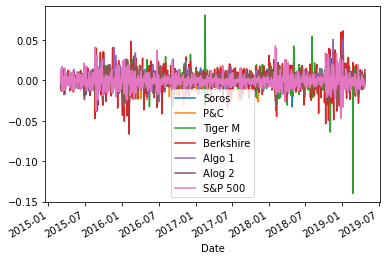

In [10]:
# calculate and plot daily returns of all portfolios
comparison_data.plot()

<AxesSubplot:xlabel='Date'>

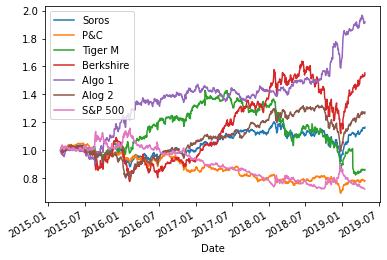

In [11]:
# calculate cumulative returns for all portfolios 
cumlative_data = (1+ comparison_data).cumprod()
cumlative_data.plot()

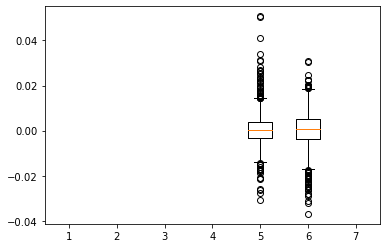

In [12]:
# create a box plot for each of the returns 

plt.boxplot(comparison_data)
plt.show()

In [13]:
#calculate the SD for each portfolio 
comparison_data_SD = comparison_data.std()
comparison_data.head()

,Soros,P&C,Tiger M,Berkshire,Algo 1,Alog 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


In [14]:
#determine which are riskier than the 500 snd it displays the highest risk stock to the lowest risk in comparsion to S&P 500

comparison_risk = comparison_data.std() * np.sqrt(252)
comparison_risk.sort_values(inplace=True, ascending=False)
comparison_risk


Berkshire    0.205077
Tiger M      0.172936
S&P 500      0.136268
Alog 2       0.132374
Soros        0.125335
Algo 1       0.120987
P&C          0.111488
dtype: float64

In [15]:
#calculate the annualized SD

annualized_std = comparison_data * np.sqrt(252)
annualized_std.head()




,Soros,P&C,Tiger M,Berkshire,Algo 1,Alog 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.129501,0.050799,0.072377
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,0.069972
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.018964
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.228239
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.062370


<AxesSubplot:xlabel='Date'>

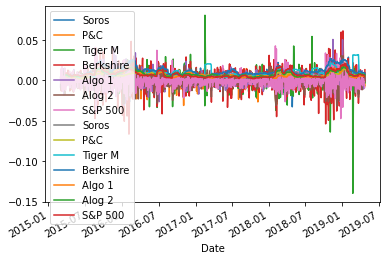

In [16]:
#calculate the plot the rolling sd for 21 days

ax = comparison_data.plot()

comparison_data.rolling(window=21).std().plot(ax=ax)








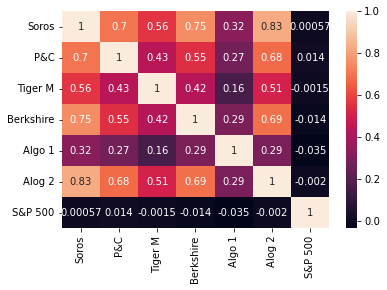

In [18]:
# calculate the correlation and dsiplay the matrix

correlation = comparison_data.corr()




#correlation matrix

sns.heatmap(correlation, annot=True)
plt.show()



In [19]:
#using the daily returns, calculate an visualize the annualized Sharpe ratio using a bar plot

sharpe_ratios = (comparison_data.mean() * 252) / (comparison_data.std() * np.sqrt(252))

sharpe_ratios



Soros        0.356417
P&C         -0.483570
Tiger M     -0.121060
Berkshire    0.621810
Algo 1       1.360829
Alog 2       0.506929
S&P 500     -0.510171
dtype: float64

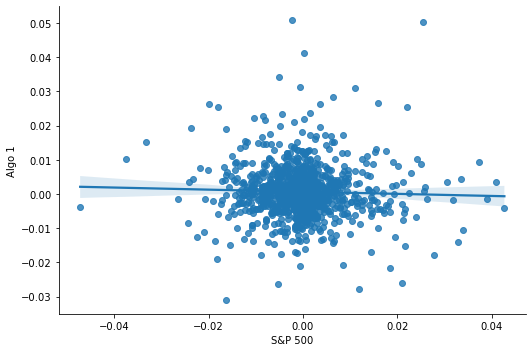

In [20]:
#we will be calculating the covariance of Whales and the variance of S&P 500 

covariance = comparison_data['Algo 1'].cov(comparison_data['S&P 500'])

varience = comparison_data['S&P 500'].var()

algo1_beta = covariance/varience

sns.lmplot(x='S&P 500', y= 'Algo 1', data=comparison_data, aspect=1.5, fit_reg=True)



